In [1]:
import javabridge
import os
import glob
import pandas as pd
import pydot
from IPython.display import SVG

In [2]:
tetrad_libdir = os.path.join(os.getcwd(), '..','..','src', 'pycausal', 'lib')
for l in glob.glob(tetrad_libdir + os.sep + "*.jar"):
    print (l)
    javabridge.JARS.append(str(l))

/home/jovyan/py-causal/example/javabridge/../../src/pycausal/lib/tetrad-lib-6.4.0-SNAPSHOT-tetradcmd.jar
/home/jovyan/py-causal/example/javabridge/../../src/pycausal/lib/data-reader-0.2.3-SNAPSHOT.jar


In [3]:
javabridge.start_vm(run_headless=True, max_heap_size = '100M')
javabridge.attach()

In [4]:
seed = 123
numNodes = 20
numEdges = 40

In [5]:
RandomUtil = javabridge.static_call("edu/cmu/tetrad/util/RandomUtil","getInstance","()Ledu/cmu/tetrad/util/RandomUtil;")
javabridge.call(RandomUtil, "setSeed", "(J)V", seed)

In [6]:
dag = None
initEdges = -1
while initEdges < numEdges:
    graph = javabridge.static_call("edu/cmu/tetrad/graph/GraphUtils","randomGraph","(IIIIIIZ)Ledu/cmu/tetrad/graph/Graph;",numNodes,0,numEdges,30,15,15,False)
    dag = javabridge.JClassWrapper("edu.cmu.tetrad.graph.Dag")(graph)
    initEdges = dag.getNumEdges()

In [7]:
dag

Instance of edu.cmu.tetrad.graph.Dag: Graph Nodes:
X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20

Graph Edges:
1. X1 --> X16
2. X1 --> X17
3. X1 --> X4
4. X1 --> X6
5. X1 --> X8
6. X10 --> X15
7. X10 --> X18
8. X10 --> X20
9. X11 --> X12
10. X11 --> X14
11. X11 --> X16
12. X11 --> X20
13. X12 --> X16
14. X13 --> X14
15. X13 --> X19
16. X13 --> X20
17. X14 --> X17
18. X15 --> X17
19. X15 --> X19
20. X17 --> X18
21. X2 --> X11
22. X2 --> X15
23. X2 --> X20
24. X2 --> X8
25. X3 --> X12
26. X4 --> X15
27. X4 --> X18
28. X5 --> X12
29. X5 --> X14
30. X5 --> X17
31. X5 --> X19
32. X5 --> X8
33. X6 --> X12
34. X6 --> X13
35. X6 --> X15
36. X7 --> X19
37. X7 --> X20
38. X7 --> X8
39. X7 --> X9
40. X8 --> X11

In [8]:
graph = pydot.Dot(graph_type='digraph')
n = dag.getNodes().toString()
n = n[1:len(n)-1]
n = n.split(",")
nodes = []
for i in range(0,len(n)):
    node = n[i]
    n[i] = node.strip()
    nodes.append(pydot.Node(n[i]))
    graph.add_node(nodes[i])

In [9]:
def isNodeExisting(nodes,node):
    try:
        nodes.index(node)
        return True
    except IndexError:
        print ("Node %s does not exist!".format(node))
        return False

e = dag.getEdges().toString()
e = e[1:len(e)-1]
e = e.split(",")
for i in range(0,len(e)):
    e[i] = e[i].strip()
    token = e[i].split(" ")
    if(len(token) == 3):
        src = token[0]
        arc = token[1]
        dst = token[2]
        if(isNodeExisting(n,src) and isNodeExisting(n,dst)):
            edge = pydot.Edge(nodes[n.index(src)],nodes[n.index(dst)])
            
            if(arc[0] != "-"):
                edge.set_dir("both")
            
            if(arc[0] == "o"):
                edge.set_arrowtail("odot")
            elif(arc[0] == "<"):
                edge.set_arrowtail("normal")
            
            if(arc[2] == "-"):
                edge.set_arrowhead("none")
            elif(arc[2] == "o"):
                edge.set_arrowhead("odot")
            else:
                edge.set_arrowhead("normal")
            
            graph.add_edge(edge)

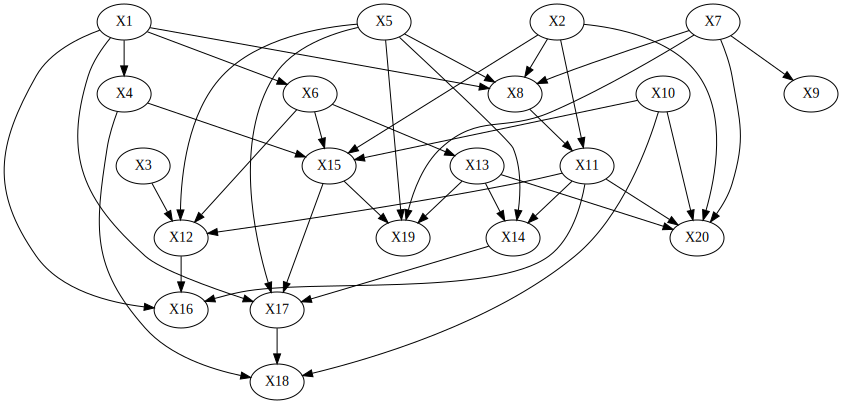

In [10]:
svg_str = graph.create_svg(prog='dot')
SVG(svg_str)

In [11]:
javabridge.detach()
javabridge.kill_vm()